# Stage One: Import 3 Documents to Compare 

I imported a corpus of text files from 3 ebooks to analyze, specifically 3 of Shakespeare's works, the Sonnets, *Romeo and Juliet*, and *Hamlet*. I also imported a tokenization library using the Natural Language toolkit. 

In [17]:
import nltk
import nltk.tokenize

nltk.download('punkt', quiet=True)

corpus = ["shakespeares_sonnets.txt","romeo_juliet.txt","hamlet.txt"]
titles = ["Shakespeare's Sonnets", "Romeo and Juliet", "Hamlet"]
documents = []
for url in corpus:
    f = open(url, encoding='utf-8')
    text = f.read()
    documents.append(text)
print(documents[1][0:100])

﻿The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use 


# Stage Two: Preprocess the Text and Create a Tokenized Corpus

I then preprocessed the text and create a tokenized corpus from the text of the imported documents. I did this by splitting up the words and making them all lower case, then removing punctuation from the text so that I could create a list of words from the text files. I then printed a random word from the document to test my code. 

In [18]:
import re


PUNCT_RE = re.compile(r'[^\w\s]+$')


def is_punct(string):
    """Check if STRING is a punctuation marker or a sequence of
       punctuation markers.
    """
    return PUNCT_RE.match(string) is not None

In [19]:
def preprocess_text(text, language, lowercase=True):
    """Preprocess a text.

    Perform a text preprocessing procedure, which transforms a string
    object into a list of word tokens without punctuation markers.

    """
    if lowercase:
        text = text.lower()
    tokens = nltk.tokenize.word_tokenize(text, language=language)
    tokens = [token for token in tokens if not is_punct(token)]
    return tokens

In [20]:
tokenized = []
for text in documents:
    tokenized.append(preprocess_text(text, "english"))

print(tokenized[0][25]) 

almost


# Stage Three: Creat a Document Term Matrix

I created a document term matrix to enable comparative textual analysis across my three documents. I extracted all of the text and created a counted collection of vocabulary. I transformed my list of vocabulary into a document-term matrix which would provide counts for every word in my vocab list. I finally used NumPy to get the counts of the word "man" from all 3 documents, and the counts of the word "woman" from all three documents, so I could analyze the use of these gendered terms in Shakespeare's work. 

In [21]:
def extract_vocabulary(tokenized_corpus, min_count=1, max_count=float('inf')):
    """Extract a vocabulary from a tokenized corpus.

    Arguments:
        tokenized_corpus (list): a tokenized corpus represented, list
            of lists of strings.
        min_count (int, optional): the minimum occurrence count of a
            vocabulary item in the corpus.
        max_count (int, optional): the maximum occurrence count of a
            vocabulary item in the corpus. Defaults to inf.

    Returns:
        list: An alphabetically ordered list of unique words in the
            corpus, of which the frequencies adhere to the specified
            minimum and maximum count.

    Examples:
        >>> corpus = [['the', 'man', 'love', 'man', 'the'],
                      ['the', 'love', 'book', 'wise', 'drama'],
                      ['a', 'story', 'book', 'drama']]
        >>> extract_vocabulary(corpus, min_count=2)
        ['book', 'drama', 'love', 'man', 'the']

    """
    vocabulary = collections.Counter()
    for document in tokenized_corpus:
        vocabulary.update(document)
    vocabulary = {word for word, count in vocabulary.items()
                  if count >= min_count and count <= max_count}
    return sorted(vocabulary)
import collections
vocabulary = extract_vocabulary(tokenized, min_count=2)
print(vocabulary[0:100])

["'as-is", "'d", "'fair", "'gainst", "'ll", "'s", "'t", "'this", "'truth", "'twixt", "'will", '1', '1.', '1.a', '1.b', '1.c', '1.d', '1.e', '1.e.1', '1.e.2', '1.e.3', '1.e.4', '1.e.5', '1.e.6', '1.e.7', '1.e.8', '1.e.9', '1.f', '1.f.1', '1.f.2', '1.f.3', '1.f.4', '1.f.5', '1.f.6', '1500', '1998', '2.', '20', '2001', '2021', '3', '3.', '30', '4', '4.', '5,000', '5.', '50', '501', '596-1887.', '60', '64-6221541.', '801', '809', '84116', '90', '_', '_a', '_advances._', '_aside._', '_behind._', '_beneath._', '_breaking', '_dies._', '_draws._', '_exeunt', '_exeunt._', '_exit', '_exit._', '_falls', '_ghost', '_gives', '_he', '_knocking._', '_laertes', '_laying', '_leaps', '_march', '_reads._', '_retires._', '_retiring', '_sings._', '_stabs', '_the', '_they', '_throws', '_to', '_within._', 'a', 'abate', 'abhor', 'abhorred', 'abide', 'able', 'aboard', 'about', 'above', 'abram', 'abroad', 'absence']


In [22]:
def corpus2dtm(tokenized_corpus, vocabulary):
    """Transform a tokenized corpus into a document-term matrix.

    Arguments:
        tokenized_corpus (list): a tokenized corpus as a list of
        lists of strings. vocabulary (list): An list of unique words.

    Returns:
        list: A list of lists representing the frequency of each term
              in `vocabulary` for each document in the corpus.

    Examples:
        >>> tokenized_corpus = [['the', 'man', 'man', 'smart'],
                                ['a', 'the', 'man' 'love'],
                                ['love', 'book', 'journey']]
        >>> vocab = ['book', 'journey', 'man', 'love']
        >>> corpus2dtm(tokenized_corpus, vocabulary)
        [[0, 0, 2, 0], [0, 0, 1, 1], [1, 1, 0, 1]]

    """
    document_term_matrix = []
    for document in tokenized_corpus:
        document_counts = collections.Counter(document)
        row = [document_counts[word] for word in vocabulary]
        document_term_matrix.append(row)
    return document_term_matrix

import numpy as np

document_term_matrix = np.array(corpus2dtm(tokenized, vocabulary))
woman_id = vocabulary.index('woman')
man_id = vocabulary.index('man')

woman_counts = document_term_matrix[:, woman_id]
man_counts = document_term_matrix[:, man_id]
print("Woman: " + str(woman_counts))
print("Man: " + str(man_counts))

Woman: [6 3 8]
Man: [ 7 71 57]


# Stage Four: Chart a Comparison between Documents 

I imported a plotting library in order to chart a word frequency comparison between the documents and map it into a bar graph. I chose to map the comparisons between the use of man and woman in each text using the word frequency from above. 

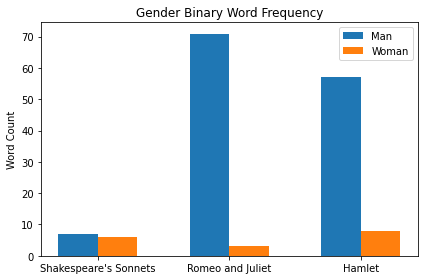

In [23]:
import matplotlib.pyplot as plt

x = np.arange(len(titles))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, man_counts, width, label='Man')
rects2 = ax.bar(x + width/2, woman_counts, width, label='Woman')

ax.set_ylabel('Word Count')
ax.set_title('Gender Binary Word Frequency')
ax.set_xticks(x)
ax.set_xticklabels(titles)
ax.legend()

fig.tight_layout()

plt.show()

# Stage Five: Calculate the Euclidean Distance 

Finally, I calculated the Euclidean distance between the documents, using my two key words of "man" and "woman" as the point of comparison. I am comparing the documents and their similarities or differences in how often they use the gendered terms identified. I found that *Hamlet* and *Romeo and Juliet* are similar in that they both use the word "man" often but the word "woman" much less. The Sonnets are different from both texts in that they use "man" and "woman" with similar frequency, and less overall. 

In [24]:
sonnets = np.array([woman_counts[0], man_counts[0]])
romeo = np.array([woman_counts[1], man_counts[1]])
hamlet = np.array([woman_counts[2], man_counts[2]])

In [25]:
def euclidean_distance(a, b):
    """Compute the Euclidean distance between two vectors.

    Note: ``numpy.linalg.norm(a - b)`` performs the
    same calculation using a slightly faster method.

    Arguments:
        a (numpy.ndarray): a vector of floats or ints.
        b (numpy.ndarray): a vector of floats or ints.

    Returns:
        float: The euclidean distance between vector a and b.

    Examples:
        >>> import numpy as np
        >>> a = np.array([1, 4, 2, 8])
        >>> b = np.array([2, 1, 4, 7])
        >>> round(euclidean_distance(a, b), 2)
        3.87

    """
    return np.sqrt(np.sum((a - b) ** 2))

sonnetsromeo = euclidean_distance(sonnets, romeo)
print(f'Sonnets - Romeo: {sonnetsromeo:.2f}')

sonnetshamlet = euclidean_distance(sonnets, hamlet)
print(f'Sonnets - Hamlet: {sonnetshamlet:.2f}')

romeohamlet = euclidean_distance(romeo, hamlet)
print(f'Romeo - Hamlet: {romeohamlet:.2f}')

Sonnets - Romeo: 64.07
Sonnets - Hamlet: 50.04
Romeo - Hamlet: 14.87
